<a href="https://colab.research.google.com/github/kenny08gt/proyecto_statistical_learning2/blob/master/proyectoSl2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device = 'cpu'

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
classes = ('plane', 'car', 'bird', 'cat','deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

train_dataset = torchvision.datasets.CIFAR10(root= 'p2', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root = 'p2', train=False, transform=transform, download=True)

steps = []

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(8*8*32, num_classes)
        
    def forward(self, x):
        step = []
        step.append(x)
        out = self.layer1(x)
        step.append(out);
        out = self.layer2(out)
        step.append(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
#         step.append(out)
        steps.append(step)
        return out

def train(epochs, batch_size, lr):
    # Hyper parameters
    steps = []
    num_epochs = epochs
    num_classes = 10
    batch_size = batch_size
    learning_rate = lr



    # Data loader
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size, 
                                               shuffle=True)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size, 
                                              shuffle=False)

    model = ConvNet(num_classes).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # Train the model
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model
    model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

    # Save the model checkpoint
    torch.save(model.state_dict(), 'cnn_'+str(epochs)+'_'+str(batch_size)+'_'+str(lr)+'.ckpt')
    

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train(10, 256, 0.005)

Epoch [1/10], Step [100/196], Loss: 1.2734
Epoch [2/10], Step [100/196], Loss: 1.0555
Epoch [3/10], Step [100/196], Loss: 0.8526
Epoch [4/10], Step [100/196], Loss: 0.8705
Epoch [5/10], Step [100/196], Loss: 0.6427
Epoch [6/10], Step [100/196], Loss: 0.5719
Epoch [7/10], Step [100/196], Loss: 0.6791
Epoch [8/10], Step [100/196], Loss: 0.6786
Epoch [9/10], Step [100/196], Loss: 0.6692
Epoch [10/10], Step [100/196], Loss: 0.7166
Test Accuracy of the model on the 10000 test images: 70.44 %


In [0]:
train(10, 512, 0.005)

Test Accuracy of the model on the 10000 test images: 72.04 %


In [0]:
train(10, 512, 0.001)

Test Accuracy of the model on the 10000 test images: 70.27 %


In [0]:
train(10, 512, 0.01)

Test Accuracy of the model on the 10000 test images: 69.71 %


In [0]:
train(10, 512, 0.0001)

Test Accuracy of the model on the 10000 test images: 59.74 %


In [0]:
train(10, 1024, 0.001)

Test Accuracy of the model on the 10000 test images: 67.48 %


In [0]:
train(10, 1024, 0.005)

Test Accuracy of the model on the 10000 test images: 66.31 %


In [0]:
train(10, 512, 0.008)

Test Accuracy of the model on the 10000 test images: 70.18 %


In [0]:
train(10, 512, 0.004)

Test Accuracy of the model on the 10000 test images: 71.99 %


In [0]:
train(10, 512, 0.003)

Test Accuracy of the model on the 10000 test images: 71.27 %


In [0]:
train(10, 512, 0.002)

Test Accuracy of the model on the 10000 test images: 66.19 %


In [0]:
train(50, 512, 0.005)

Test Accuracy of the model on the 10000 test images: 68.05 %


In [0]:
train(100, 512, 0.005)

Test Accuracy of the model on the 10000 test images: 67.5 %


---

In [8]:
torch.cuda.empty_cache() 
train(10, 512, 0.005)

Test Accuracy of the model on the 10000 test images: 70.23 %


In [9]:
import matplotlib.pyplot as plt
steps = np.array(steps)
steps.shape

(1000, 3)

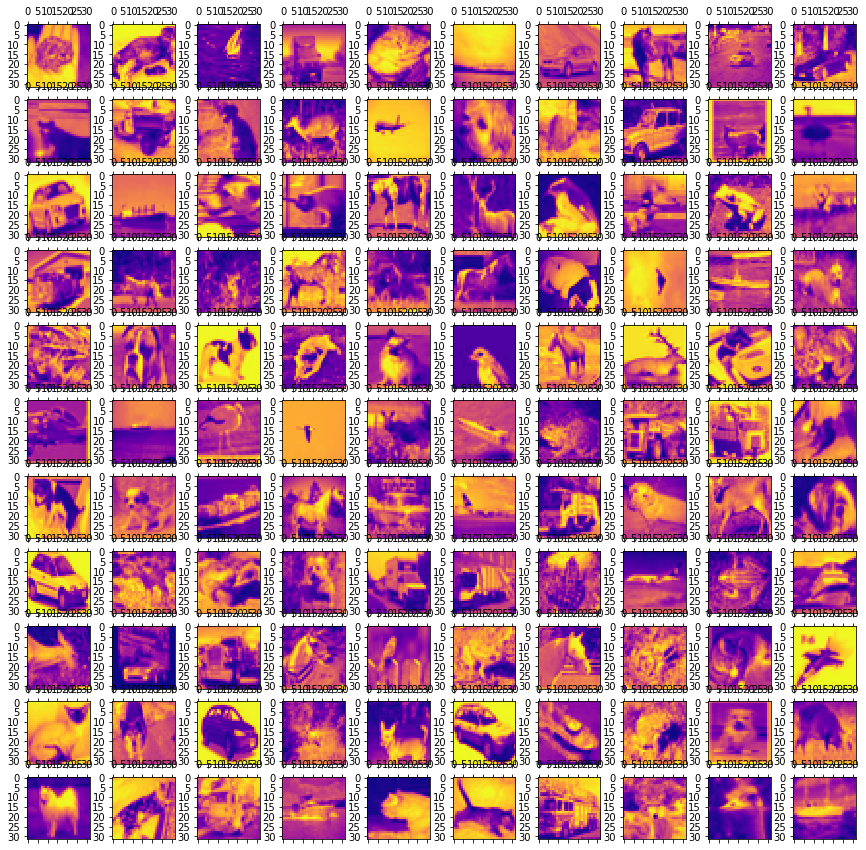

In [10]:
figsize = (20, 20)
cases = 100
cols = 10
rows = cases // cols + 1

fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(15,15))
i = 0
for row in ax:
    for col in row:
        col.matshow(steps[i][0][0][0], cmap='plasma')
        i +=1

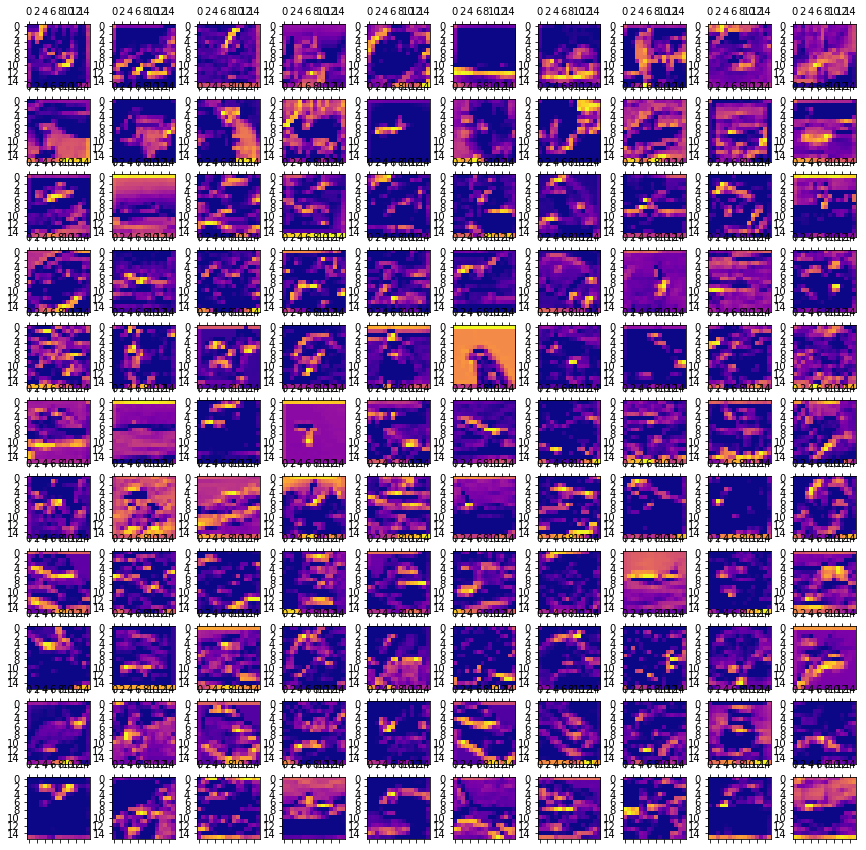

In [11]:
figsize = (20, 20)
cases = 100
cols = 10
rows = cases // cols + 1

fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(15,15))
i = 0
for row in ax:
    for col in row:
        col.matshow((steps[i][1].detach().numpy())[0][0], cmap='plasma')
        i +=1

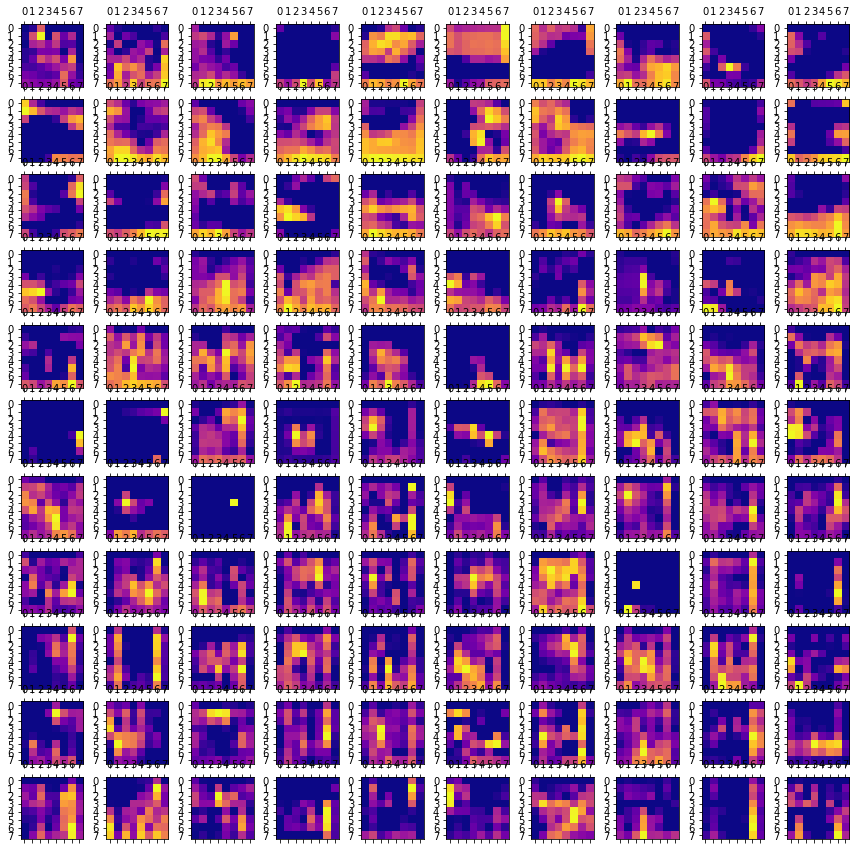

In [12]:
figsize = (20, 20)
cases = 100
cols = 10
rows = cases // cols + 1

fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(15,15))
i = 0
for row in ax:
    for col in row:
        col.matshow((steps[i][2].detach().numpy())[0][0], cmap='plasma')
        i +=1

In [0]:
cases = steps[0].shape[0] * steps[0][0].shape[0]* steps[0][0][0].shape[0]
cols = 5

rows = cases // cols + 1

fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(25,600))
# fig.set_figheight(100)
# fig.set_figwidth(100)
i = 0
j = 0
k = 0
l = 0
for row in ax:
    for col in row:
#         print(j,k)
        col.matshow((steps[l][j].detach().numpy())[0][k], cmap='plasma')
#         print(steps[0].shape[0])
        if k  + 1< steps[0][j][0].shape[0]:
            k += 1
        else:
            k = 0
            if j + 1 < steps[0].shape[0]:
                j += 1
            else:
                j = 0
                l += 1
        i +=1
#         if i >= 10:
#             break
#     if i >= 10:
#             break
plt.show()